# Coursework 1 - Articial Intelligence and Machine Learning
# Student Name: Nourhan Moustafa Mahmoud Mohamed El-Bagoury
# Student Email: NMOHAM301@caledonian.ac.uk

I confirm that the material contained within the submitted coursework is all my own work and from the labs material provided by the tutor unless otherwise stated below.

---


# 1. Problem Definition



# Background:

Bike sharing systems are new generation of conventional bike rentals in which The entire process of membership, rental, and return procedure has been optimized. Through these systems, Users can rent bicycles from a central location and return them just as conveniently  anywhere else. Currently, there are over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, they draw as a matter of interest due to their vital role in traffic, environmental consequences, vehicles emissions, and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them appealing to researchers. Compared to other modes of travel  such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This attribute turns bike sharing system into
a virtual sensor network that can be utilised to detect urban mobility. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

Dataset: 

Bike-sharing rental system is highly correlated to the environmental and seasonal conditions. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

Dataset Characteristics, The dataset contains the following colums which described as follows:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is "Yes" otherwise "No"
	
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered [1].

# Introduction

In this project,  the first six steps of the machine learning pipline process will be implemented to predict the bike rental count hourly based on the environmental and seasonal information in the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA.

The first six steps are as follows:

1) Problem Definition
2) Data Ingestion
3) Data Preparation
4) Data Segregation
5) Model Training
6) Model Evaluation

 ### Regression:

It is defined as 'A regression problem is when the output variable is a real or continuous value, such as “salary” or “weight”. Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points' [2].

### Regression Problem: 

This dataset introduces a regression problem because we are predicting an output of continous numeric value which is the bike rental count. As the machine learning model algorithm tends to regonize the framework of continous data mapping patterns.

### Problem statement: 

The goal of this investigation is to build predictive models to determine whether bike rental count is affected by seasonal changes or not, using the dataset given fields. During this process, two machine learning models will be used which are decision tree and support vector machine.

In [14]:
#import all relevant Python modules
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Data Ingestion

### 2.1 Loading the data as a csv file using the pandas library into a dataframe named 'data', then printing out the top 10 raws of the loaded file. 

In [15]:
#load the data
data = pd.read_csv("hour.csv")
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,8,6,14


# 2.2 Data Description

### A detailed statistical description of each field data type will be presented below:

As a first step, differentiating both the numerical and categorical fields in the data, with a highligh on the target variable which is the 'cnt' colum.

### Target Variable
- cnt

### Categorical data
- dteday
- workingday

Note: All categorical fields either will be droped or will be encoded to be recogrized by the used models.

### Numerical data
- instant
- season
- yr
- mnth
- hr
- holiday
- weekday
-weathersit
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt

In [16]:
#Defining the numerical and categorical fields

numerical_feats = data.dtypes[data.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print(data[numerical_feats].columns)
print("-"*100)

categorical_feats = data.dtypes[data.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))
print(data[categorical_feats].columns)

Number of Numerical features:  15
Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Number of Categorical features:  2
Index(['dteday', 'workingday'], dtype='object')


Then, getting the shape of the data to show the number of colums and rows provided within the file which are 17 colums and 17379 rows.

In [17]:
# Number of colums & rows in the dataset
print('The dataset has {} rows and {} colums'.format(data.shape[0], data.shape[1]))

The dataset has 17379 rows and 17 colums


### Printing out the names of the colums within the file.

In [18]:
# Name of the provided headers
print(list(data.columns.values))

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


### Printing out the type of the data in each column within the file whether it is integer, float, or string(object).

In [19]:
# Type of the data in each colum
DataType = data.dtypes
print('Data type of each column:')
print(DataType)

Data type of each column:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday     object
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Highlighting any umnumeric data to be either droped if irrelevent of to be encoded into a numeric value to be recognized by the model which are the 'dteday' and 'workingday' colums.

In [20]:
# Descovering any umnumeric data
data.dtypes == 'object'

instant       False
dteday         True
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday     True
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

### Printing another general overview of the file data types.

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  int64  
 10  temp        15595 non-null  float64
 11  atemp       15595 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


# 3. Data Preparation

General exploratory data analysis shows the following finds:

- Missing values are in the ‘temp’ and ‘atemp’ columns.
- The peak usage hours are: 7-9AM and 4-7PM on working days, and 10am-4pm on non-working days.
- At night (10pm-4am) the bike rentals are low
- If the humidity or wind-speed is high, the number of rentals decreases.

### 3.1 Handle missing values

To handle the missing values, I started the process by exploring which fields have the null values and how many are they. As given in the exploratory data analysis the missing values are in the ‘temp’ and ‘atemp’ columns with 1784 NAN value.

In [22]:
# Exploring NAN feilds
data.isnull(). any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp           True
atemp          True
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [23]:
#Exploring number of NAN values
data.isnull(). sum().sort_values(ascending=False)

atemp         1784
temp          1784
instant          0
weathersit       0
registered       0
casual           0
windspeed        0
hum              0
workingday       0
dteday           0
weekday          0
holiday          0
hr               0
mnth             0
yr               0
season           0
cnt              0
dtype: int64

### Fill the missing values in the temp colums

The forward fill function will be implemeted to fill in the missing values in the tempreture colums. From my prespective, I believe this is the best approach to mirror the most close tempreture to the actual value as tempreture degrees tend to be extremely close in consective days. This function works by copying the previous input to the next NAN cell.

In [24]:
#fill in the missing values using .ffill function
data['temp'] = data['temp'].ffill(axis=0)
data['atemp'] = data['atemp'].ffill(axis=0)

data.head(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,8,6,14


In [25]:
#validating there is no more missing values as follows:
data.isnull(). sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 3.2 Peak time field

As given in the general exploratory data analysis, the peak usage hours are: 7-9AM and 4-7PM on working days, and 10am-4pm on non-working days which can be devided as follows using the 24 hr format:

- Morning peak hours in working days 7<=9 am
- Night peak hours in working days 16<=19 pm
- Peak hours in non-working 10<=16 pm 

In order to determine whother it is peak time or not within the day, Our strategy will divid the day into two fields, either it is peak time which will take the value of '1' and non-peak time (any other time) will be '0'


In [26]:
#create a peak time field
data['Peak'] = 0

data.loc[((data['hr'] >= 7) & (data['hr'] <= 9)) & (data['workingday'] =='Yes'), 'Peak'] = 1
data.loc[((data['hr'] >= 16) & (data['hr'] <= 19)) & (data['workingday'] =='Yes'), 'Peak'] = 1
data.loc[((data['hr'] >= 10) & (data['hr'] <= 16)) & (data['workingday'] =='No'), 'Peak'] = 1

data.head(50)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Peak
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40,0
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32,0
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13,0
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1,0
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,0,1,1,0
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,0,2,0
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,1,2,3,0
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,1,7,8,0
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,8,6,14,0


### 3.3 Night time field

The same strategy of the peak time field will be implemented in the night time field which will go as follows:

The general exploratory data analysis showed that the night hours are from 10:00 PM till 04:00 AM. Following the 24 hr timing, it wil be divied into before mid-night and after mid-night as follows:

A night feild will be created and all its value will equal to 0 except for the period from 10:00 PM till 04:00 AM. 


In [27]:
#create a night time field
data['night'] = 0

data.loc[((data['hr'] >= 22) & (data['hr'] <= 23)), 'night'] = 1
data.loc[((data['hr'] >= 0) & (data['hr'] <= 4)), 'night'] = 1

data.head(50)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Peak,night
0,1,2011-01-01,1,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0000,3,13,16,0,1
1,2,2011-01-01,1,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0000,8,32,40,0,1
2,3,2011-01-01,1,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0000,5,27,32,0,1
3,4,2011-01-01,1,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0000,3,10,13,0,1
4,5,2011-01-01,1,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0000,0,1,1,0,1
5,6,2011-01-01,1,0,1,5,0,6,No,2,0.24,0.2576,0.75,0.0896,0,1,1,0,0
6,7,2011-01-01,1,0,1,6,0,6,No,1,0.22,0.2727,0.80,0.0000,2,0,2,0,0
7,8,2011-01-01,1,0,1,7,0,6,No,1,0.20,0.2576,0.86,0.0000,1,2,3,0,0
8,9,2011-01-01,1,0,1,8,0,6,No,1,0.24,0.2879,0.75,0.0000,1,7,8,0,0
9,10,2011-01-01,1,0,1,9,0,6,No,1,0.32,0.3485,0.76,0.0000,8,6,14,0,0


### 3.4 Dropping irrelevant colums

Based of the information above, the colums 'registered','casual', 'instant', 'dteday' seem irrelevent to out analysis and prediction.

In [28]:
#droppingg unnecessary colums
data = data.drop(columns=['registered','casual', 'instant', 'dteday', 'yr', 'mnth'])
data.head(5)

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Peak,night
0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0,16,0,1
1,1,1,0,6,No,1,0.22,0.2727,0.80,0.0,40,0,1
2,1,2,0,6,No,1,0.22,0.2727,0.80,0.0,32,0,1
3,1,3,0,6,No,1,0.24,0.2879,0.75,0.0,13,0,1
4,1,4,0,6,No,1,0.24,0.2879,0.75,0.0,1,0,1


### 3.5 Binning data

Data binning is a data pre-processing technique that is used to group data into buckets by transformig numeric data into categorical ordinal values using statistics to divide the data into low, medium, and high bins. The binning process inevitably leads to loss of information. However, it reduces the chance of overfitting. Certainly, there will be improvements in speed and reduction of memory or storage requirements and redundancy. Moreover, the used decision tree model tends to have the problem of overfitting. Thus, the binning process will reduce such problem.

In this dataset, we will use the 'temp' column and create an ordinal value with three bins, using the describe() function to get the statistical description of the 'temp' colum, it presents the following:

50%   0.50: Less than or equals to 50 degrees is considered as low

75%   0.66: Less than or equals to 66 degrees is considered as medium

max   1.00: Less than or equals to 100 degrees is considered as high

Accordingly, we will use the following ordinal values: - Low Temp : 1 - Medium Temp : 2 - High Temp: 3

Low Temp 0<=0.50 Degrees = 1
Medium Temp 0.50<=0.66 Degrees = 2
High Temp 1.0<= Degrees = 3



In [29]:
#getting the statistical description of the 'temp' colum to determine the coponents of each bin
data['temp'].describe()

count    17379.000000
mean         0.496841
std          0.192549
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

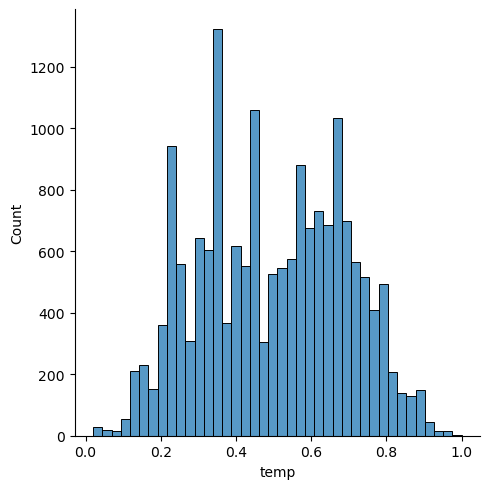

In [30]:
#plotting the 'temp' colum
sns.displot(data['temp'])

In [31]:
#replace the 'temp' values with the above-mentioned ordinal values
data.loc[data['temp'] <= 0.5, 'temp'] = 1
data.loc[(data['temp'] > 0.5) & (data['temp'] <= 0.66), 'temp'] = 2
data.loc[data['temp'] >= 1.0, 'temp'] = 3
data.head(10)

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Peak,night
0,1,0,0,6,No,1,3.0,0.2879,0.81,0.0000,16,0,1
1,1,1,0,6,No,1,3.0,0.2727,0.80,0.0000,40,0,1
2,1,2,0,6,No,1,3.0,0.2727,0.80,0.0000,32,0,1
3,1,3,0,6,No,1,3.0,0.2879,0.75,0.0000,13,0,1
4,1,4,0,6,No,1,3.0,0.2879,0.75,0.0000,1,0,1
5,1,5,0,6,No,2,3.0,0.2576,0.75,0.0896,1,0,0
6,1,6,0,6,No,1,3.0,0.2727,0.80,0.0000,2,0,0
7,1,7,0,6,No,1,3.0,0.2576,0.86,0.0000,3,0,0
8,1,8,0,6,No,1,3.0,0.2879,0.75,0.0000,8,0,0
9,1,9,0,6,No,1,3.0,0.3485,0.76,0.0000,14,0,0


In [32]:
#validating the replacment of the 'temp' values by the statistical description
data['temp'].describe()

count    17379.000000
mean         2.518418
std          0.921857
min          0.680000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: temp, dtype: float64

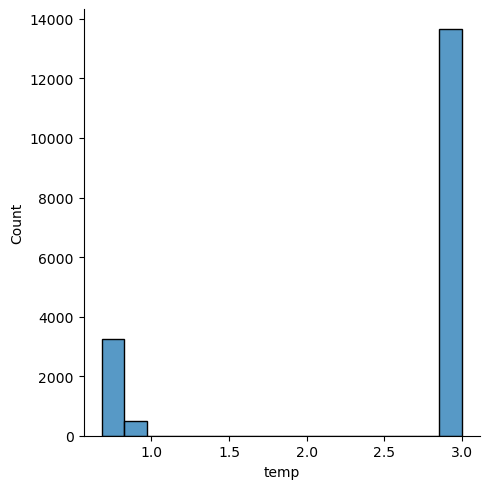

In [33]:
#validating the replacment of the 'temp' values by plotting
sns.displot(data['temp'])

In [34]:
#getting the statistical description of the 'cnt' colum to determine the coponents of each bin
data['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

### Plotting the correlation between the 'cnt' colum and the other seasonal and environmental conditions.

<AxesSubplot: xlabel='temp', ylabel='cnt'>

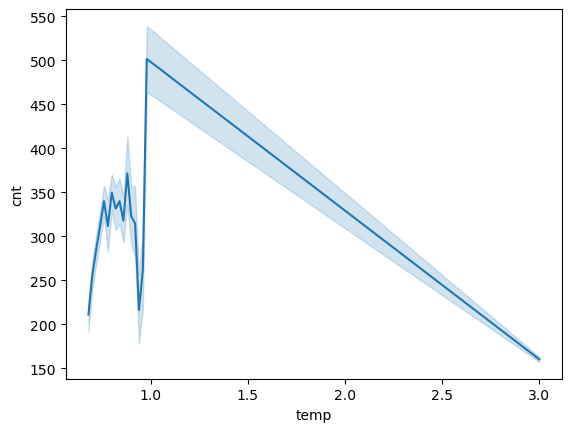

In [35]:
#plotting the correlation between the 'cnt' colum and the 'temp' colum
corr = data['temp'].corr(data['cnt'])
sns.lineplot(x=data['temp'], y=data['cnt'])

The plot shows that he higher the temperature, the higher the bike rental count. The warm weather promotes people's use of bikes.

<AxesSubplot: xlabel='windspeed', ylabel='cnt'>

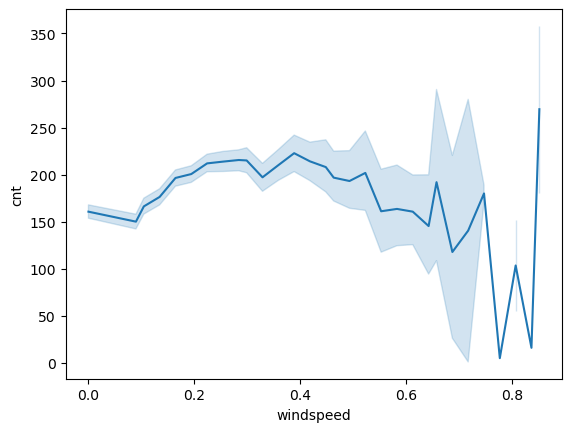

In [36]:
corr = data['windspeed'].corr(data['cnt'])
sns.lineplot(x=data['windspeed'], y=data['cnt'])

The plot shows that he higher the wind spead, the less the bike rental count. High windspeed declines people's use of bikes.

<AxesSubplot: xlabel='hum', ylabel='cnt'>

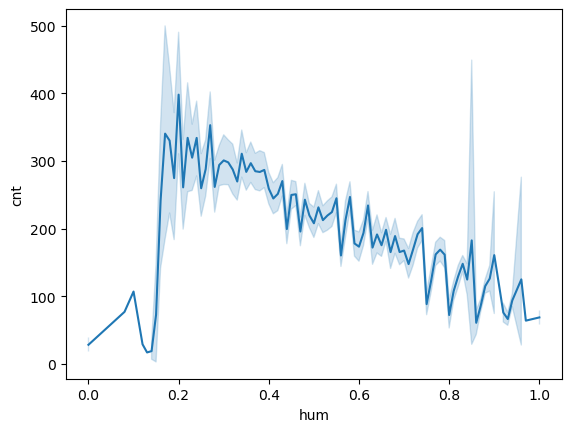

In [37]:
#plotting the correlation between the 'cnt' colum and the 'hum' colum
corr = data['hum'].corr(data['cnt'])
sns.lineplot(x=data['hum'], y=data['cnt'])

The plot shows that he higher the hummidity, the less the bike rental count. High hummidity declines people's use of bikes.

<AxesSubplot: xlabel='season', ylabel='cnt'>

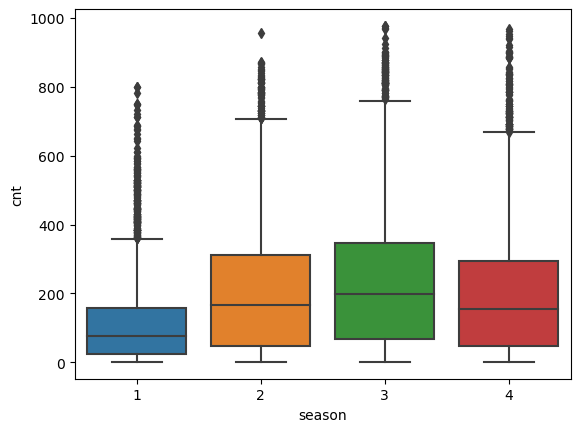

In [38]:
#plotting the correlation between the 'cnt' colum and the 'season' colum
corr = data['season'].corr(data['cnt'])
sns.boxplot(x=data['season'], y=data['cnt'])

The plot shows that bikes rental count is reduced in winter and spring seasons.

<AxesSubplot: xlabel='holiday', ylabel='cnt'>

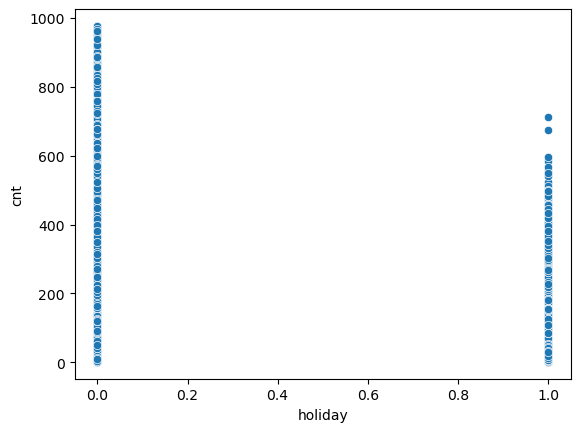

In [39]:
#plotting the correlation between the 'cnt' colum and the 'holiday' colum
corr = data['holiday'].corr(data['cnt'])
sns.scatterplot(x=data['holiday'], y=data['cnt'])

The plot shows that people tends to rent bikes in working day more than a holiday.

### Note: 

Holiday stands for [1]

Non-holiday stands for [0]

### 3.6 Encoding the data

The last step of the data preparation process is to encode any non-numeric values to numeric values so that our models can grasp the data and get trained on it.

**Label Encoding**: The remaining variable that needs to be label encoded is working days. We can simply turn the various categorical values into numeric values by mapping workingday-->0 and non-workingday-->1.


In [40]:
# create a new python dictionary called workingday_dct and use the keys yes for 0 and no for 1 

workingday_dct = {"yes":0, "no":1}
data["workingday"].map(workingday_dct)

# Scikit-learn approach to label encoding. 
features_to_label_encode = ["workingday"]
for f in features_to_label_encode:
    data[f] = sklearn.preprocessing.LabelEncoder().fit_transform(data[f])


In [41]:
data.head(10)

,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Peak,night
0,1,0,0,6,0,1,3.0,0.2879,0.81,0.0000,16,0,1
1,1,1,0,6,0,1,3.0,0.2727,0.80,0.0000,40,0,1
2,1,2,0,6,0,1,3.0,0.2727,0.80,0.0000,32,0,1
3,1,3,0,6,0,1,3.0,0.2879,0.75,0.0000,13,0,1
4,1,4,0,6,0,1,3.0,0.2879,0.75,0.0000,1,0,1
5,1,5,0,6,0,2,3.0,0.2576,0.75,0.0896,1,0,0
6,1,6,0,6,0,1,3.0,0.2727,0.80,0.0000,2,0,0
7,1,7,0,6,0,1,3.0,0.2576,0.86,0.0000,3,0,0
8,1,8,0,6,0,1,3.0,0.2879,0.75,0.0000,8,0,0
9,1,9,0,6,0,1,3.0,0.3485,0.76,0.0000,14,0,0


# 4. Data Segregation

In this stage, we split the data into two sections; 80% as a training data and 20% as a testing data.

In [42]:
#split the dataset into 80% train and 20% test
train_data = data[:int(0.8*data.shape[0])]
test_data = data[int(0.8*data.shape[0]):]

print(train_data.head(10))
print(test_data.head(10))

# Automatic Test to check whether your split was correct
assert train_data.shape[0] >= 13903 and train_data.shape[0] <= 13904
assert test_data.shape[0] >= 3475 and test_data.shape[0] <= 3476


   season  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0       1   0        0        6           0           1   3.0  0.2879  0.81   
1       1   1        0        6           0           1   3.0  0.2727  0.80   
2       1   2        0        6           0           1   3.0  0.2727  0.80   
3       1   3        0        6           0           1   3.0  0.2879  0.75   
4       1   4        0        6           0           1   3.0  0.2879  0.75   
5       1   5        0        6           0           2   3.0  0.2576  0.75   
6       1   6        0        6           0           1   3.0  0.2727  0.80   
7       1   7        0        6           0           1   3.0  0.2576  0.86   
8       1   8        0        6           0           1   3.0  0.2879  0.75   
9       1   9        0        6           0           1   3.0  0.3485  0.76   

   windspeed  cnt  Peak  night  
0     0.0000   16     0      1  
1     0.0000   40     0      1  
2     0.0000   32     0      1 

In [43]:
#set the numpy random seed to 42 to avoid bais
np.random.seed(42)

#Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())

print(train_data.head(10))
print(test_data.head(10))

   season  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0       3  19        0        6           0           1  0.80  0.6970  0.27   
1       1  20        1        1           0           1  3.00  0.2424  0.41   
2       4   2        0        5           1           1  3.00  0.3030  0.66   
3       2  19        0        2           1           1  0.78  0.7121  0.52   
4       1   0        0        4           1           1  3.00  0.2273  0.56   

   windspeed  cnt  Peak  night  
0     0.1940  425     0      0  
1     0.2239   88     0      0  
2     0.2836    4     0      1  
3     0.3582  526     1      0  
4     0.3881   13     0      1  
   season  hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0       1   0        0        6           0           1   3.0  0.2879  0.81   
1       1   1        0        6           0           1   3.0  0.2727  0.80   
2       1   2        0        6           0           1   3.0  0.2727  0.80   
3       1  

In [46]:
# extract the features and labels as above and name them  in variables X and y, dropping the target colum 'cnt' to be predicted
X = data.drop(columns=['cnt'])
y = data['cnt']
# shuffle and extract an 80/20 split of the data in the dataframe df using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
# printing out the top few lines of each dataframe to check that the split was correct
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

# automatic test to check whether the split was correct
assert train_data.shape[0] >= 13903 and train_data.shape[0] <= 13904
assert test_data.shape[0] >= 3475 and test_data.shape[0] <= 3476

      season  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
335        2  23        0        4           1           1   3.0  0.6212   
7035       1   3        0        5           1           2   3.0  0.4242   
8051       4   7        0        4           1           1   3.0  0.4394   
2133       2   3        0        6           0           1   3.0  0.5303   
8485       3   0        0        6           0           1   3.0  0.6061   

       hum  windspeed  Peak  night  
335   0.35     0.2239     0      1  
7035  0.87     0.2836     0      1  
8051  0.88     0.2537     1      0  
2133  0.60     0.0896     0      1  
8485  0.78     0.1940     0      1  
       season  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
12830       3   6        0        1           1           2   3.0  0.5909   
8688        2   0        0        2           1           1   0.7  0.6667   
7091        4  14        0        4           1           1   3.0  0.3030   
12230       1

# 5. Model Training

In the model training phase, we will start with importing the models of SVR, DecisionTreeRegressor, and all nescessary modules and metrics for this training.

In [44]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as sk_mean_absolute_error
from sklearn.metrics import mean_squared_error as sk_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as sk_mean_absolute_percentage_error

# 5.1 Decision Tree

In [47]:
#call the model and fit it to the taining data
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
#run model prediction
y_prdct_model = model.predict(X_test)

In [49]:
best_DecisionTree = DecisionTreeRegressor(max_depth=4)
best_DecisionTree.fit(X_train, y_train)
predictions = best_DecisionTree.predict(X_test)

In [56]:
#calculating the mean absolute percentage error
print('The mean absolute percentage error is: %2f'% mean_absolute_percentage_error (y_test,y_prdct_model))

The mean absolute percentage error is: 0.526493


In [55]:
#calculating the root squared error
print('The root squared error is: %2f'% best_DecisionTree.score(X_train, y_train))

The root squared error is: 0.713783


In [60]:
#tuning the parameters to optimize the model using grid_search
tuned_parameters = [{'splitter': ['best', 'random'], 'max_leaf_nodes': [5, 50]}]

model = DecisionTreeRegressor()

grid_search_dt = GridSearchCV(
    model, tuned_parameters)
grid_search_dt.fit(X_train, y_train)


print("Best parameters:", grid_search_dt.best_params_)

Best parameters: {'max_leaf_nodes': 50, 'splitter': 'best'}


In [61]:
#predicting on a new data sample after optimization
y_prdct_opt = grid_search_dt.predict(X_test)

In [62]:
#calculating the mean absolute percentage error after optimization
print('The mean absolute percentage error is: %2f'% mean_absolute_percentage_error (y_test,y_prdct_opt))


The mean absolute percentage error is: 0.942667


In [63]:
#calculating the root squared erro after optimization
print('The root squared error is: %2f'% grid_search_dt.score(X_train, y_train))

The root squared error is: 0.804280


In [64]:
#getting the best prediction score for the optimized model
grid_search_dt.best_score_

0.7897044043829198

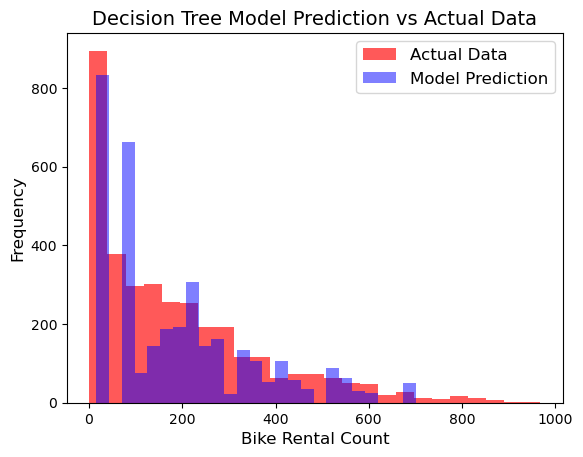

In [65]:
#plotting the comparison between the predicted and actual data
plt.title('Decision Tree Model Prediction vs Actual Data', fontsize=14)
plt.hist(y_test, alpha=0.65, bins=25, label='Actual Data', color='red')
plt.hist(y_prdct_opt, alpha=0.50, bins=25, label='Model Prediction', color='blue')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Bike Rental Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# Support Vector Machine (SVM:SVR)

In [66]:
#call the model and fit it to the taining data
m_SVR = SVR().fit(X_train, y_train)

In [67]:
#run model prediction
y_prdct_SVR = m_SVR.predict(X_test)

In [68]:
#calculating the mean absolute percentage error
print('The mean absolute percentage error is: %2f'% mean_absolute_percentage_error (y_test,y_prdct_SVR))

The mean absolute percentage error is: 1.245128


In [69]:
#calculating the root squared error
print('The root squared error is: %2f'% m_SVR.score(X_train, y_train))

The root squared error is: 0.385366


In [56]:
#tuning the parameters to optimize the model using grid_search
tuned_parameters = [
    {"kernel": ["rbf", "linear"], "gamma": [1e-3, 1e-4], "C": [100, 1000]},
]
model = SVR()

grid_search = GridSearchCV(
    model, tuned_parameters)
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}


In [49]:
y_prdct_SVR = grid_search.predict(X_test)
mean_absolute_percentage_error(y_test,y_prdct_SVR )

0.9485014702841666

In [50]:
print('The root squared error is: %2f'% grid_search.score(X_train, y_train))

The root squared error is: 0.745843


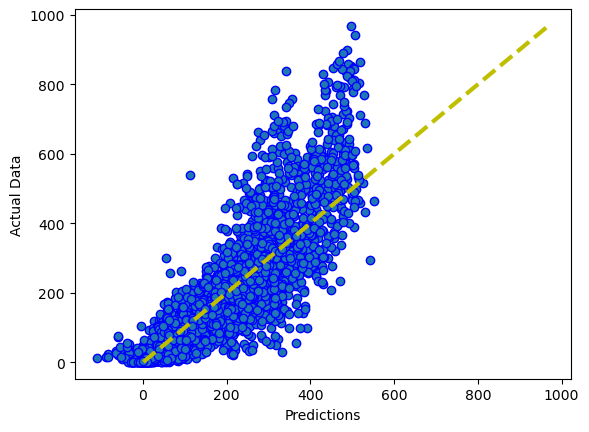

In [65]:
fig, ax = plt.subplots()
ax.scatter(y_prdct_SVR, y_test,edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'y--', lw=3)
ax.set_xlabel('Predictions')
ax.set_ylabel('Actual Data')
plt.show()


In [52]:
grid_search.best_score_

0.7417750739586396

# 6. Model Evaluation

In this section,  a couple of regression metrics will be used to ensure the correct results of the above-mentioned models.

# Regression Metrics

In [53]:
from sklearn.metrics import mean_squared_error as sk_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as sk_mean_absolute_percentage_error

In [54]:
regression_Y_pred = np.load('regression_Y_pred.npy')
regression_Y_true = np.load('regression_Y_true.npy')

In [55]:
print(f"Your mean squared error: {mean_squared_error(regression_Y_true, regression_Y_pred)} - sklearn's mean squared error: {sk_mean_squared_error(regression_Y_true, regression_Y_pred)}")

print(f"Your mean absolute percentage error: {mean_absolute_percentage_error(regression_Y_true, regression_Y_pred)} - sklearn's mean absolute percentage error: {sk_mean_absolute_percentage_error(regression_Y_true, regression_Y_pred)}")

Your mean squared error: 5.523588632282228 - sklearn's mean squared error: 5.523588632282228
Your mean absolute percentage error: 0.07561512979625772 - sklearn's mean absolute percentage error: 0.07561512979625772


# Conclusion

- The above-mentioned dataset states the following:

--- 

This cell goes to the very bottom of your submitted notebok.
You are requried to link the sources and web-links that you have used for various parts of this coursework. 

Write them sources used in the following format similar to the first examle in the sources list below :

    - what you have used them for : web-link

Sources:

[1] - Readme File
[2] - Regresstion Problem Definition : shorturl.at/ikoqy
